In [496]:

import os                           
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def DataToCsv(page_string):
    
    Address=list()
    Beds=list()
    Price=list()
    Type=list()
    Seller=list()
    Company=list()
    Baths=list()
    City=list()
    df=pd.DataFrame(columns=["Address","Price","Type","Beds","Baths","Seller","Company"])
    for j in range(2,30):
        print(j)
        UrlSite = "https://www.point2homes.com/CA/Real-Estate-Listings/"+page_string+".html?page="+str(j)
        response1 = requests.get(UrlSite)
        soup = BeautifulSoup(response1.content,"html.parser")
        m = soup.findAll("div",attrs={"class":"characteristics-cnt"})
        for t in range(len(m)):
            try:
                beds = m[t].find("li",attrs={"class":"ic-beds"})
                Beds.append(beds.get_text().replace("\r"," ").replace("\n"," ").replace("BedBd"," ").replace("s"," ").replace("Bed Bd"," ").strip())
            except:
                Beds.append(None)
        m = soup.findAll("div",attrs={"class":"characteristics-cnt"})
        for t in range(len(m)):
            try:
                baths = m[t].find("li",attrs={"class":"ic-baths"})
                Baths.append(baths.get_text().replace("\r"," ").replace("\n"," ").replace("BathBa"," ").replace("BathsBa"," ").strip())
            except:
                Baths.append(None)
        m = soup.findAll("div",attrs={"class":"characteristics-cnt"})
        for t in range(len(m)):
            try:
                types = m[t].find("li",attrs={"class":"property-type"})
                Type.append(types.get_text().replace("\r"," ").replace("\n"," ").strip())
            except:
                Type.append(None)
        m = soup.findAll("div",attrs={"class":"price"})
        for t in range(len(m)):
            try:
                prices = m[t].find("span",attrs={"class":"green"})
                Price.append(prices.get_text().replace("\r"," ").replace("\n"," ").replace("CAD"," ").replace("$"," ").replace(",","").strip())
            except:
                Price.append(None)
        m = soup.findAll("div",attrs={"class":"item-address"})
        for t in range(len(m)):
            try:
                add = m[t].find("div",attrs={"class":"address-container"})
                Address.append(add.get_text().replace("\r"," ").replace("\n"," ").strip())
                try:
                    stringcity55 = re.findall(", \w+,",add.get_text().replace("\r"," ").replace("\n"," ").strip())
                    City.append(stringcity55[0].replace(",",""))
                except:
                    City.append(None)
            except:
                Address.append(None)
        m = soup.findAll("div",attrs={"class":"agent-details"})
        if(len(m)==0):
            Seller.append(None)
        for t in range(len(m)):
            try:
                seller = m[t].find("div",attrs={"class":"agent-name"})
                Seller.append(seller.get_text().replace("\r"," ").replace("\n"," ").strip())
            except:
                Seller.append(None)
        m = soup.findAll("div",attrs={"class":"agent-details"})
        if(len(m)==0):
            Company.append(None)
        for t in range(len(m)):
            try:
                company = m[t].find("div",attrs={"class":"agent-company"})
                Company.append(company.get_text().replace("\r"," ").replace("\n"," ").strip())
            except:
                Company.append(None)
        for i in range(0,24):
            if(len(Seller)/24!=0):
                for i in range(len(Address)-len(Seller)):
                    Seller.append(None)
            if(len(Company)/24!=0):
                for i in range(len(Address)-len(Company)):
                    Company.append(None)
    df=pd.DataFrame({"Address":Address,"Price":Price,"Type":Type,"Beds":Beds,"Baths":Baths,"Company":Company,"Seller":Seller,"City":City})
    return df
    #df.to_csv('Apartments.csv', index = False)

In [497]:
dfON=pd.DataFrame()
dfAB=pd.DataFrame()
dfNL=pd.DataFrame()
dfBC=pd.DataFrame()
dfPE=pd.DataFrame()
dfMB=pd.DataFrame()
dfNS=pd.DataFrame()
dfQC=pd.DataFrame()
dfNB=pd.DataFrame()
dfSK=pd.DataFrame()



dfON =DataToCsv("ON")
dfAB=DataToCsv("AB")
dfNL=DataToCsv("NL")
dfBC=DataToCsv("BC")
dfPE=DataToCsv("PE")
dfMB=DataToCsv("MB")
dfNS=DataToCsv("NS")
dfQC=DataToCsv("QC")
dfNB=DataToCsv("NB")
dfSK=DataToCsv("SK")
merge_df = pd.concat([dfON,dfAB,dfNL,dfBC,dfPE,dfMB,dfNS,dfQC,dfNB,dfSK], ignore_index=True)
print(merge_df)
merge_df.to_csv('Apartments.csv', index = False)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
                                                Address    Price  \
0     McLevin Ave and Tapscott Rd, Toronto, Toronto,...   799900   
1     Sixth Line & Bowbeer Road, Oakville, Oakville,...  2199900   
2     540 Davis Dr W, Newmarket, New

In [590]:
newdf=pd.read_csv("Apartments.csv")
newdf=newdf.dropna(subset=["Beds","Baths"],axis=0)
newdf['Baths'] = newdf['Baths'].astype(int)
newdf['Beds'] = newdf['Beds'].astype(int)
newdf['Price']=newdf['Price'].astype(float)
newdf['Price']=newdf['Price']/1000
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4664 entries, 0 to 6718
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  4664 non-null   object 
 1   Price    4664 non-null   float64
 2   Type     4664 non-null   object 
 3   Beds     4664 non-null   int32  
 4   Baths    4664 non-null   int32  
 5   Company  527 non-null    object 
 6   Seller   528 non-null    object 
 7   City     3365 non-null   object 
dtypes: float64(1), int32(2), object(5)
memory usage: 291.5+ KB


Text(0, 0.5, 'Company Name')

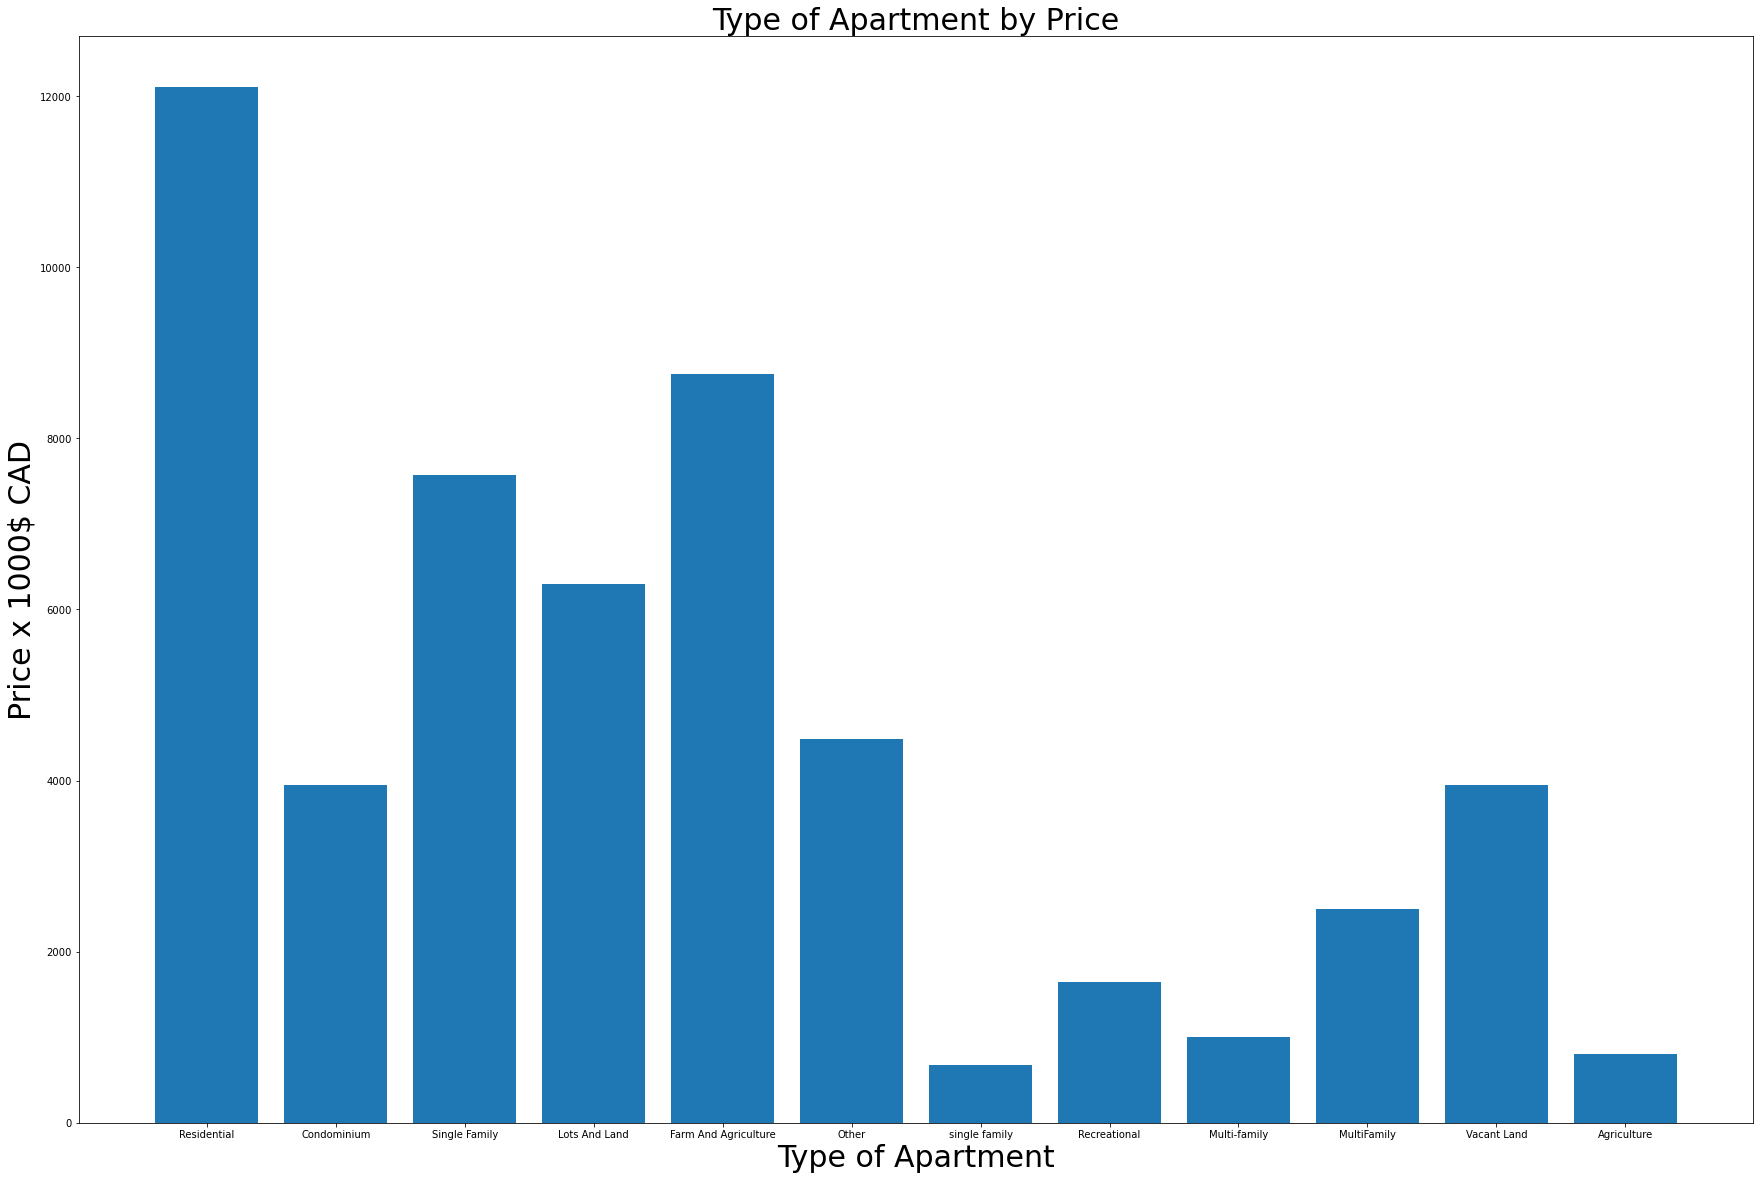

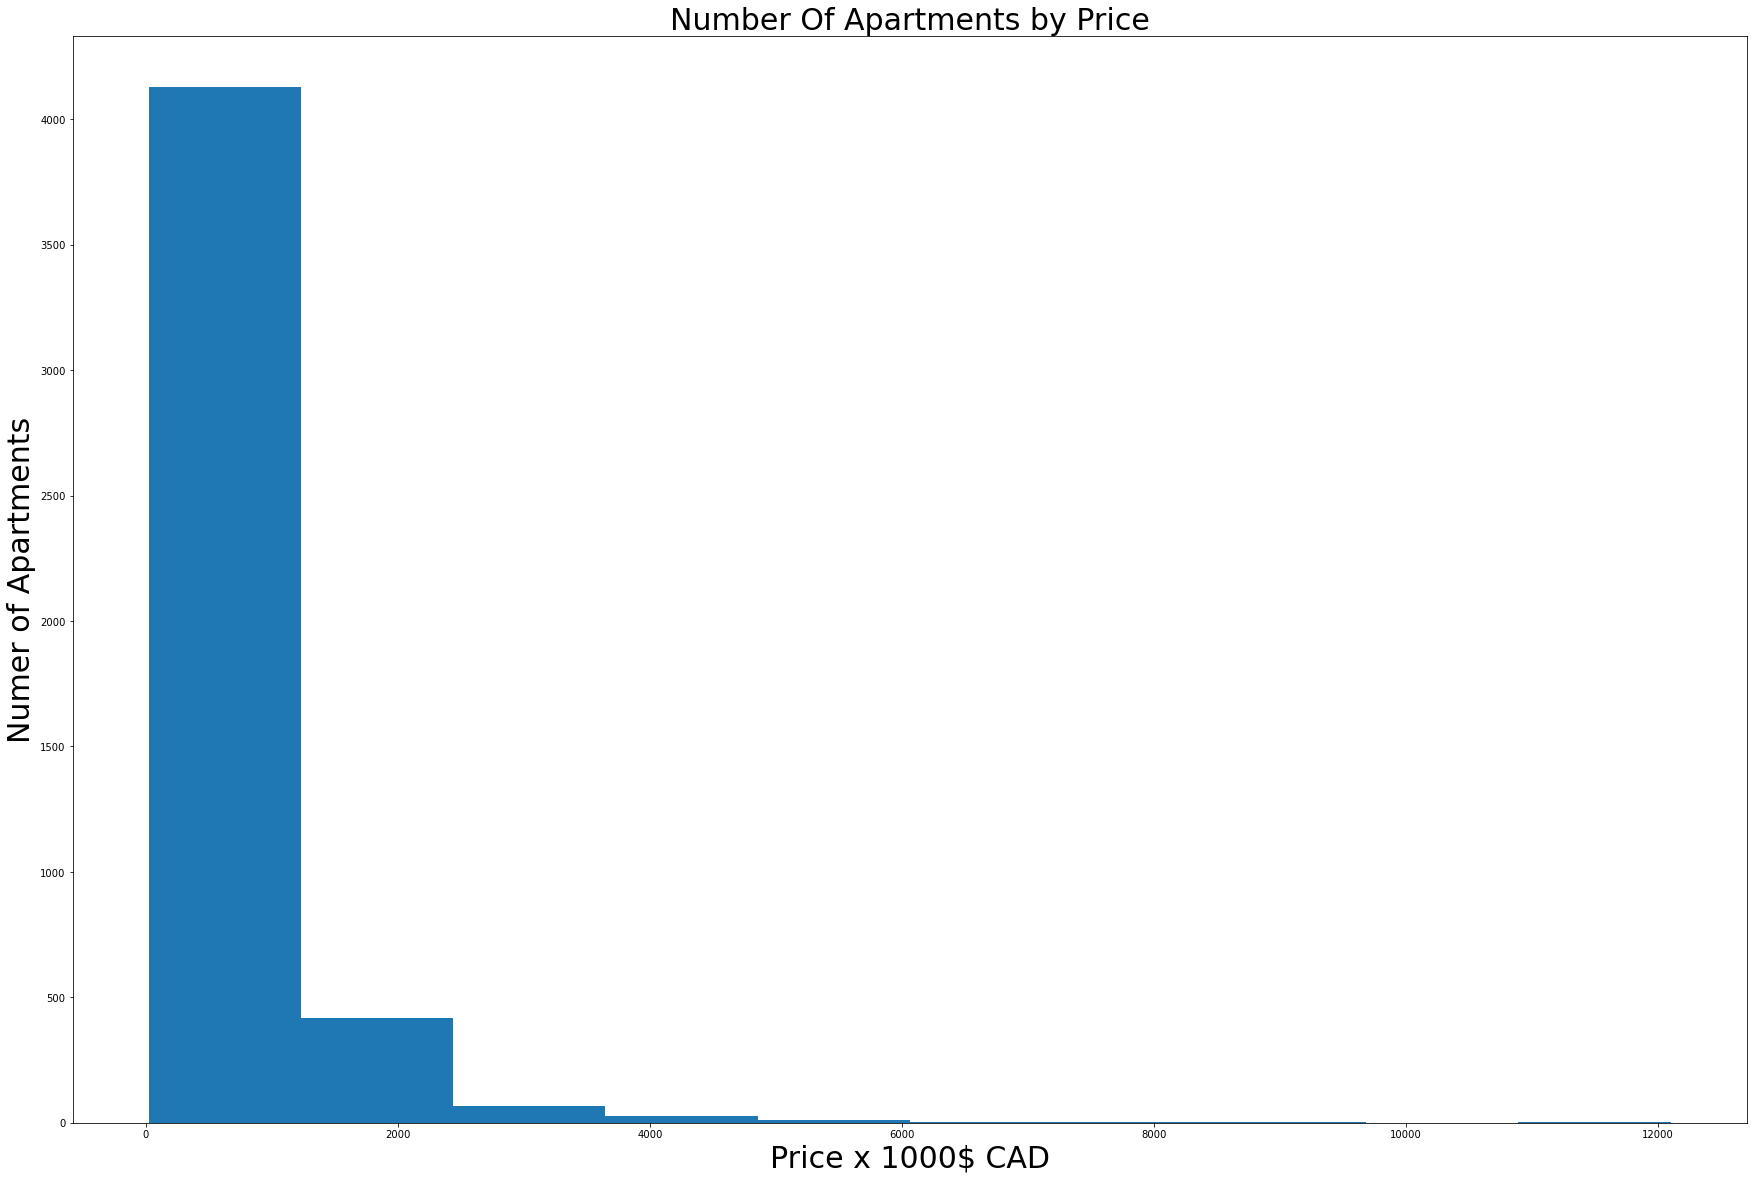

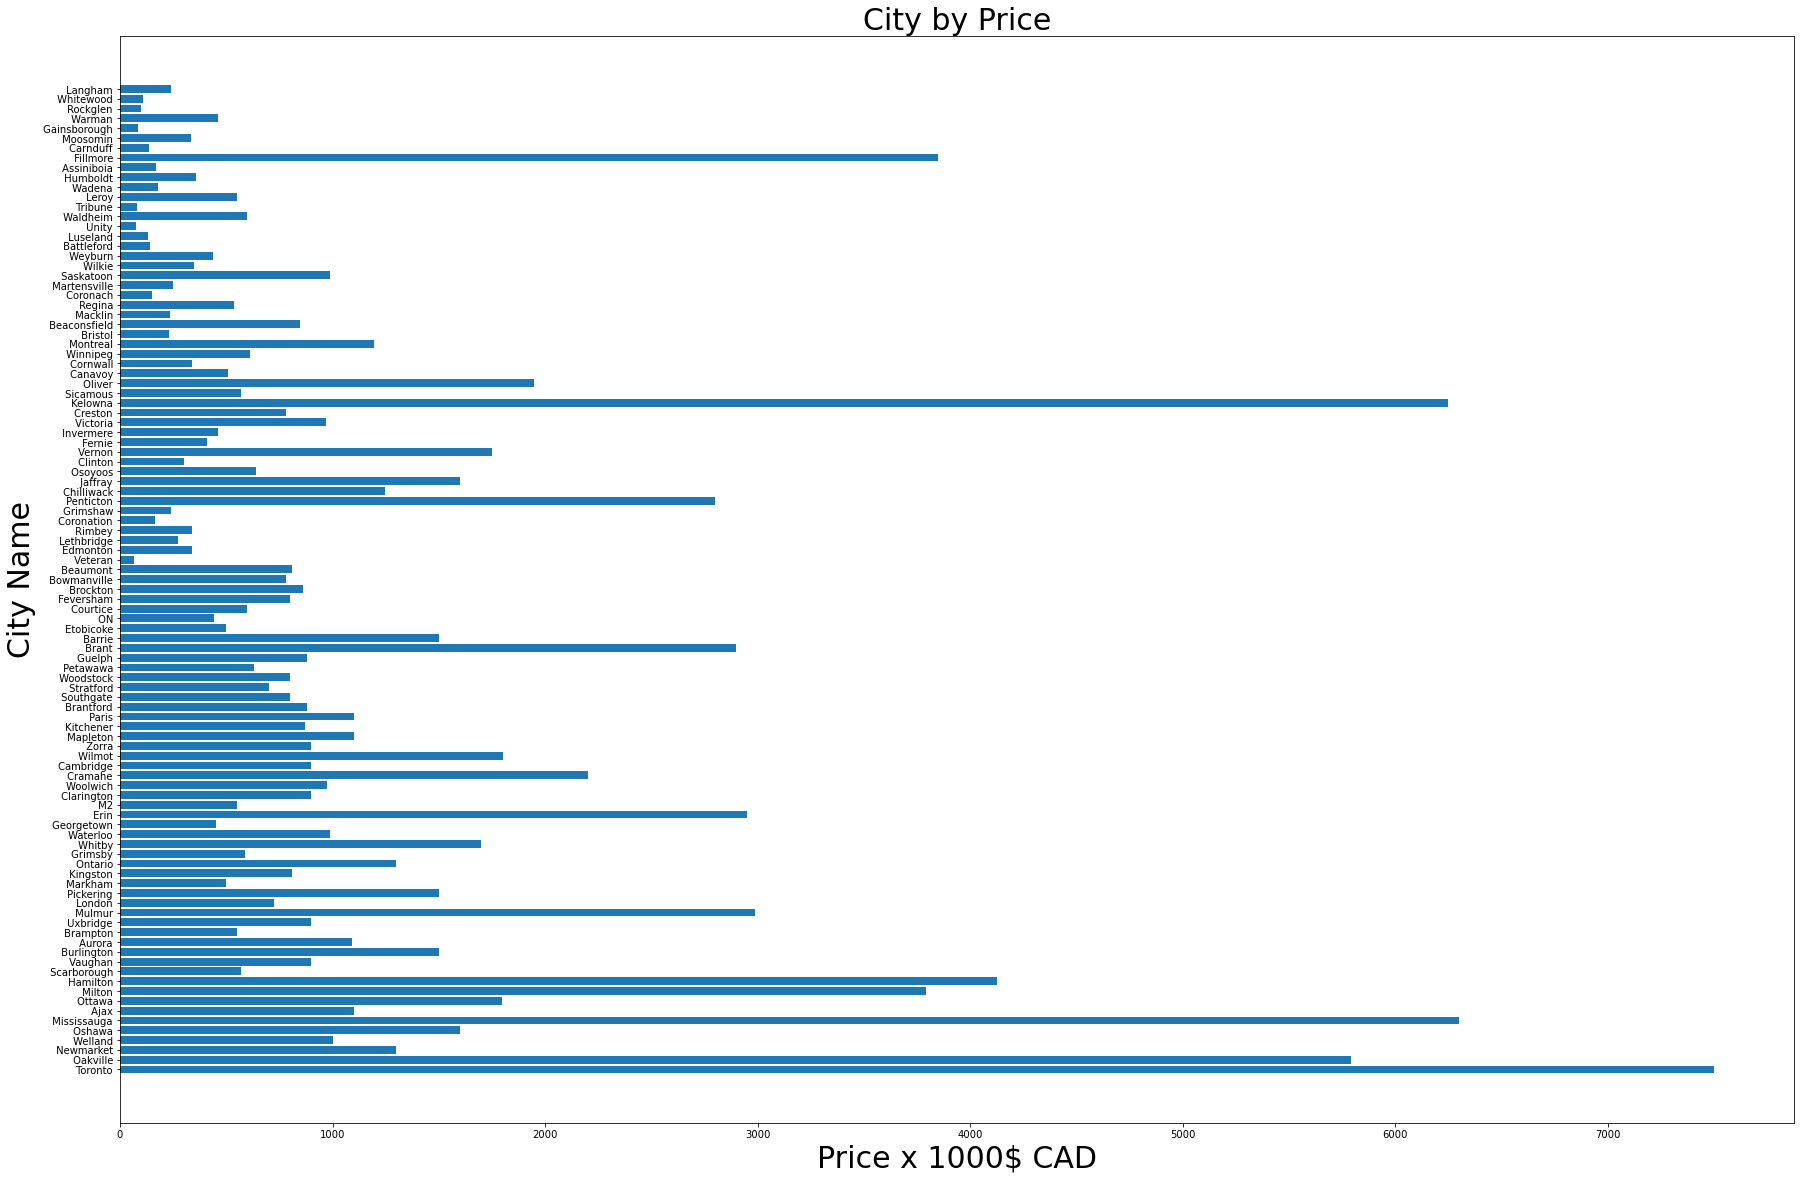

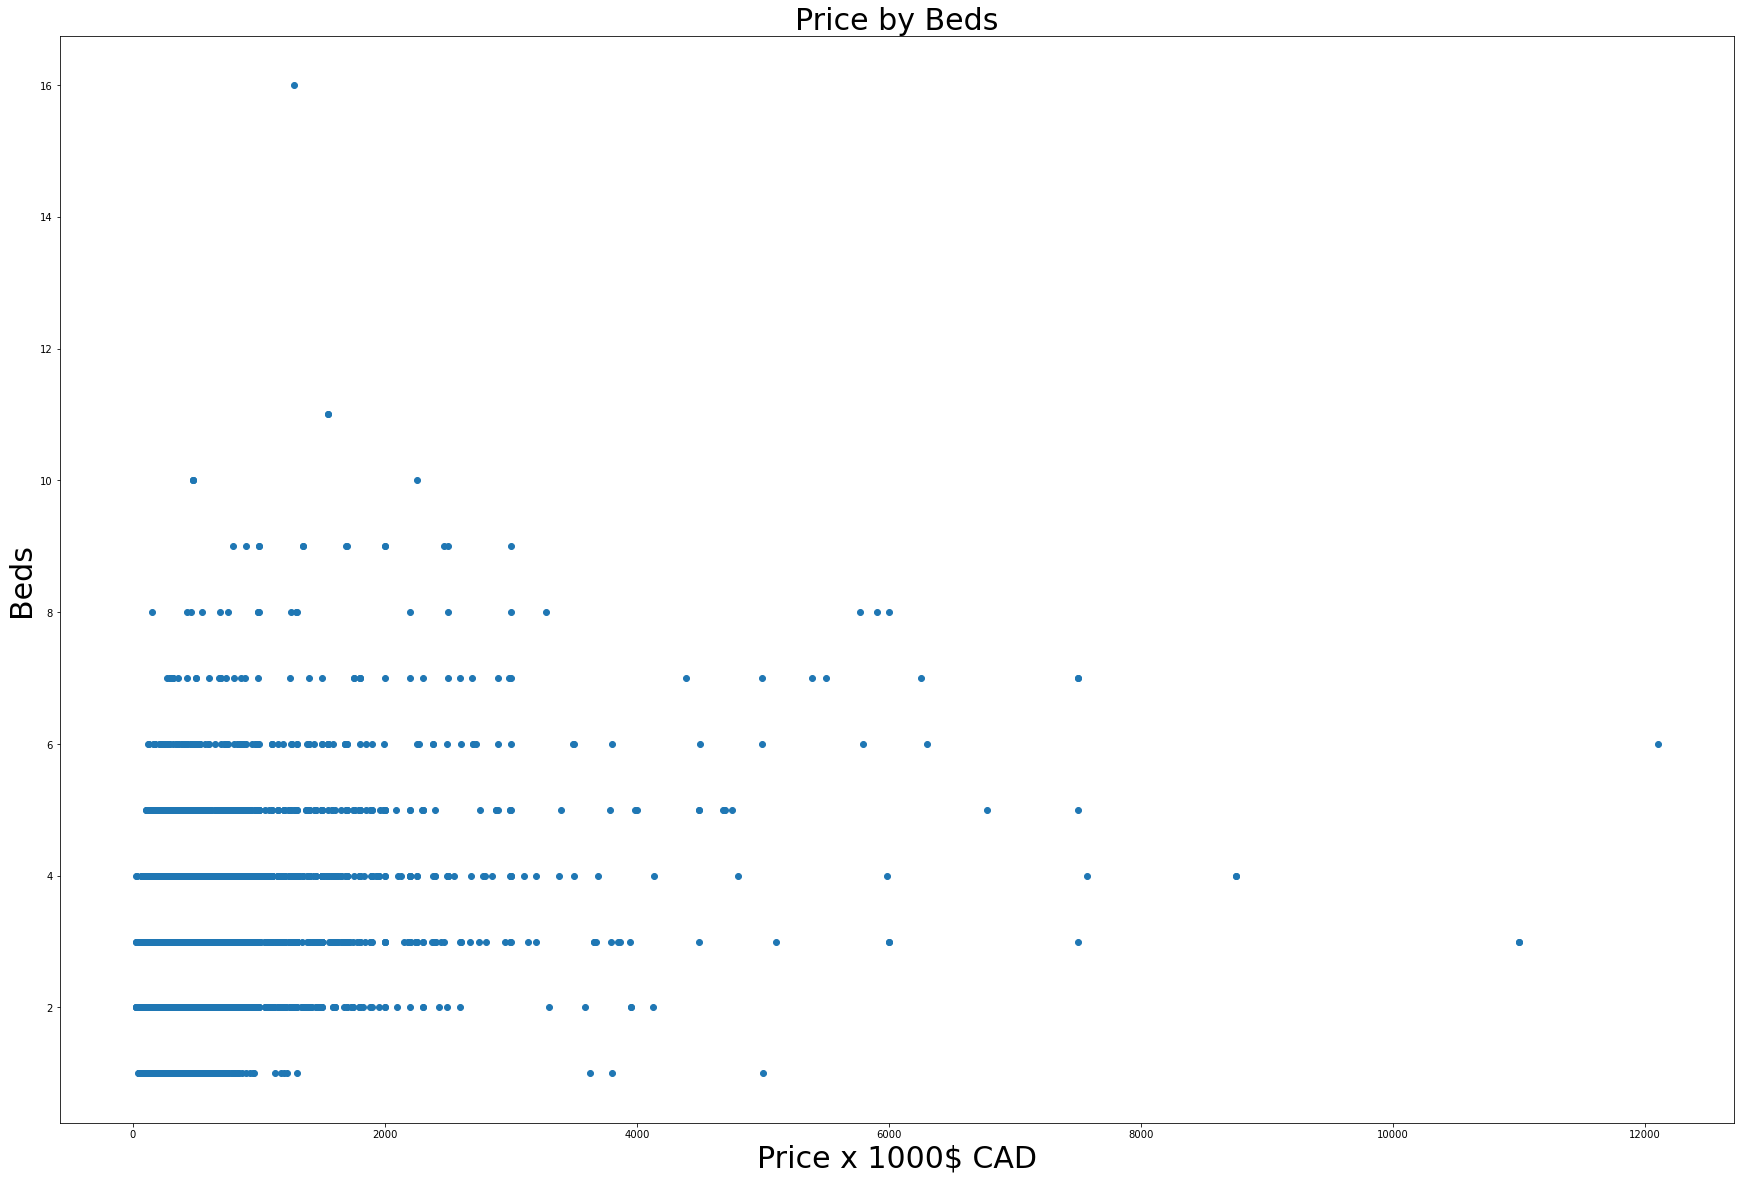

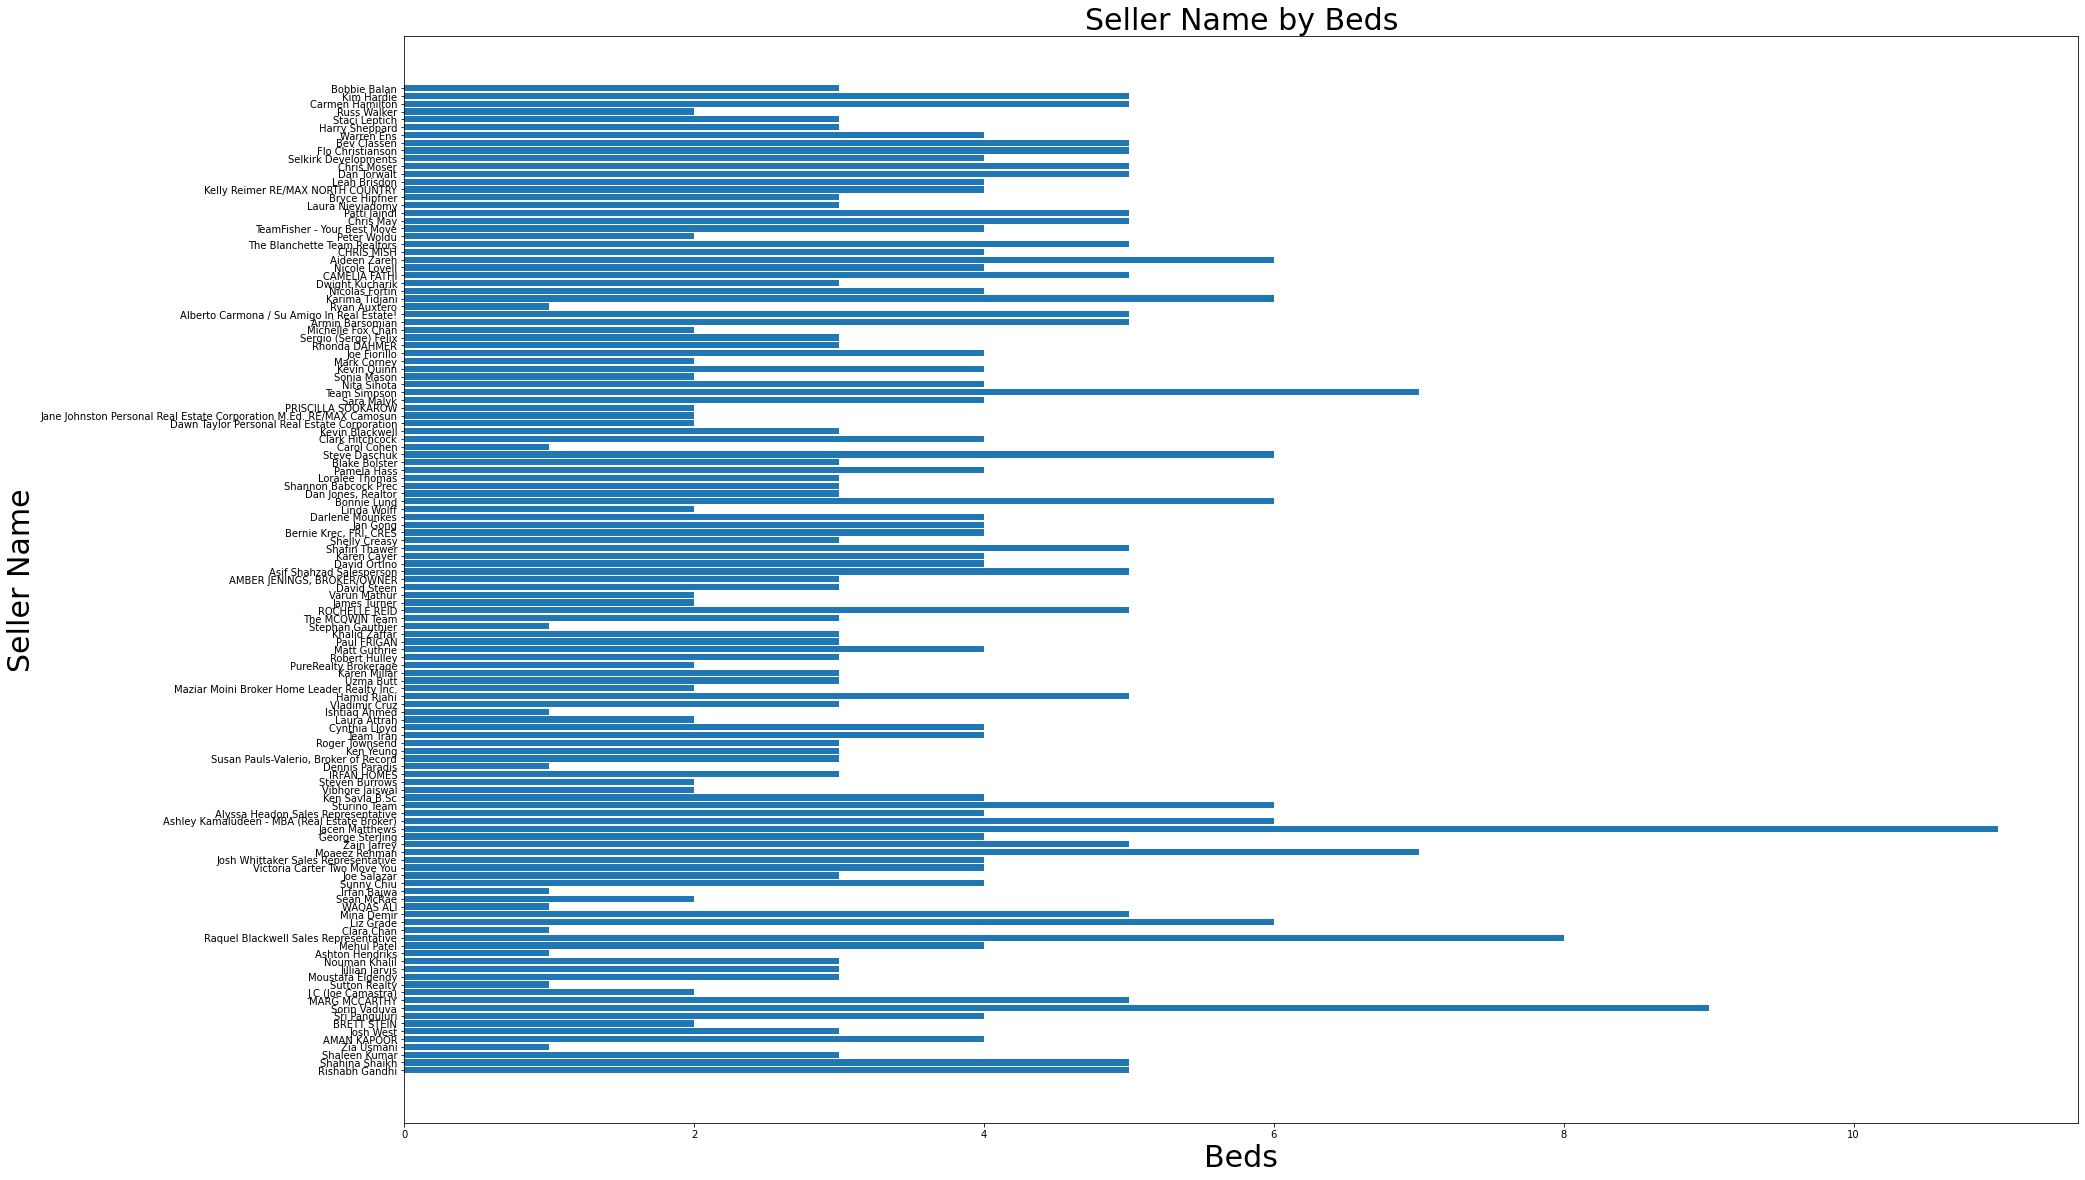

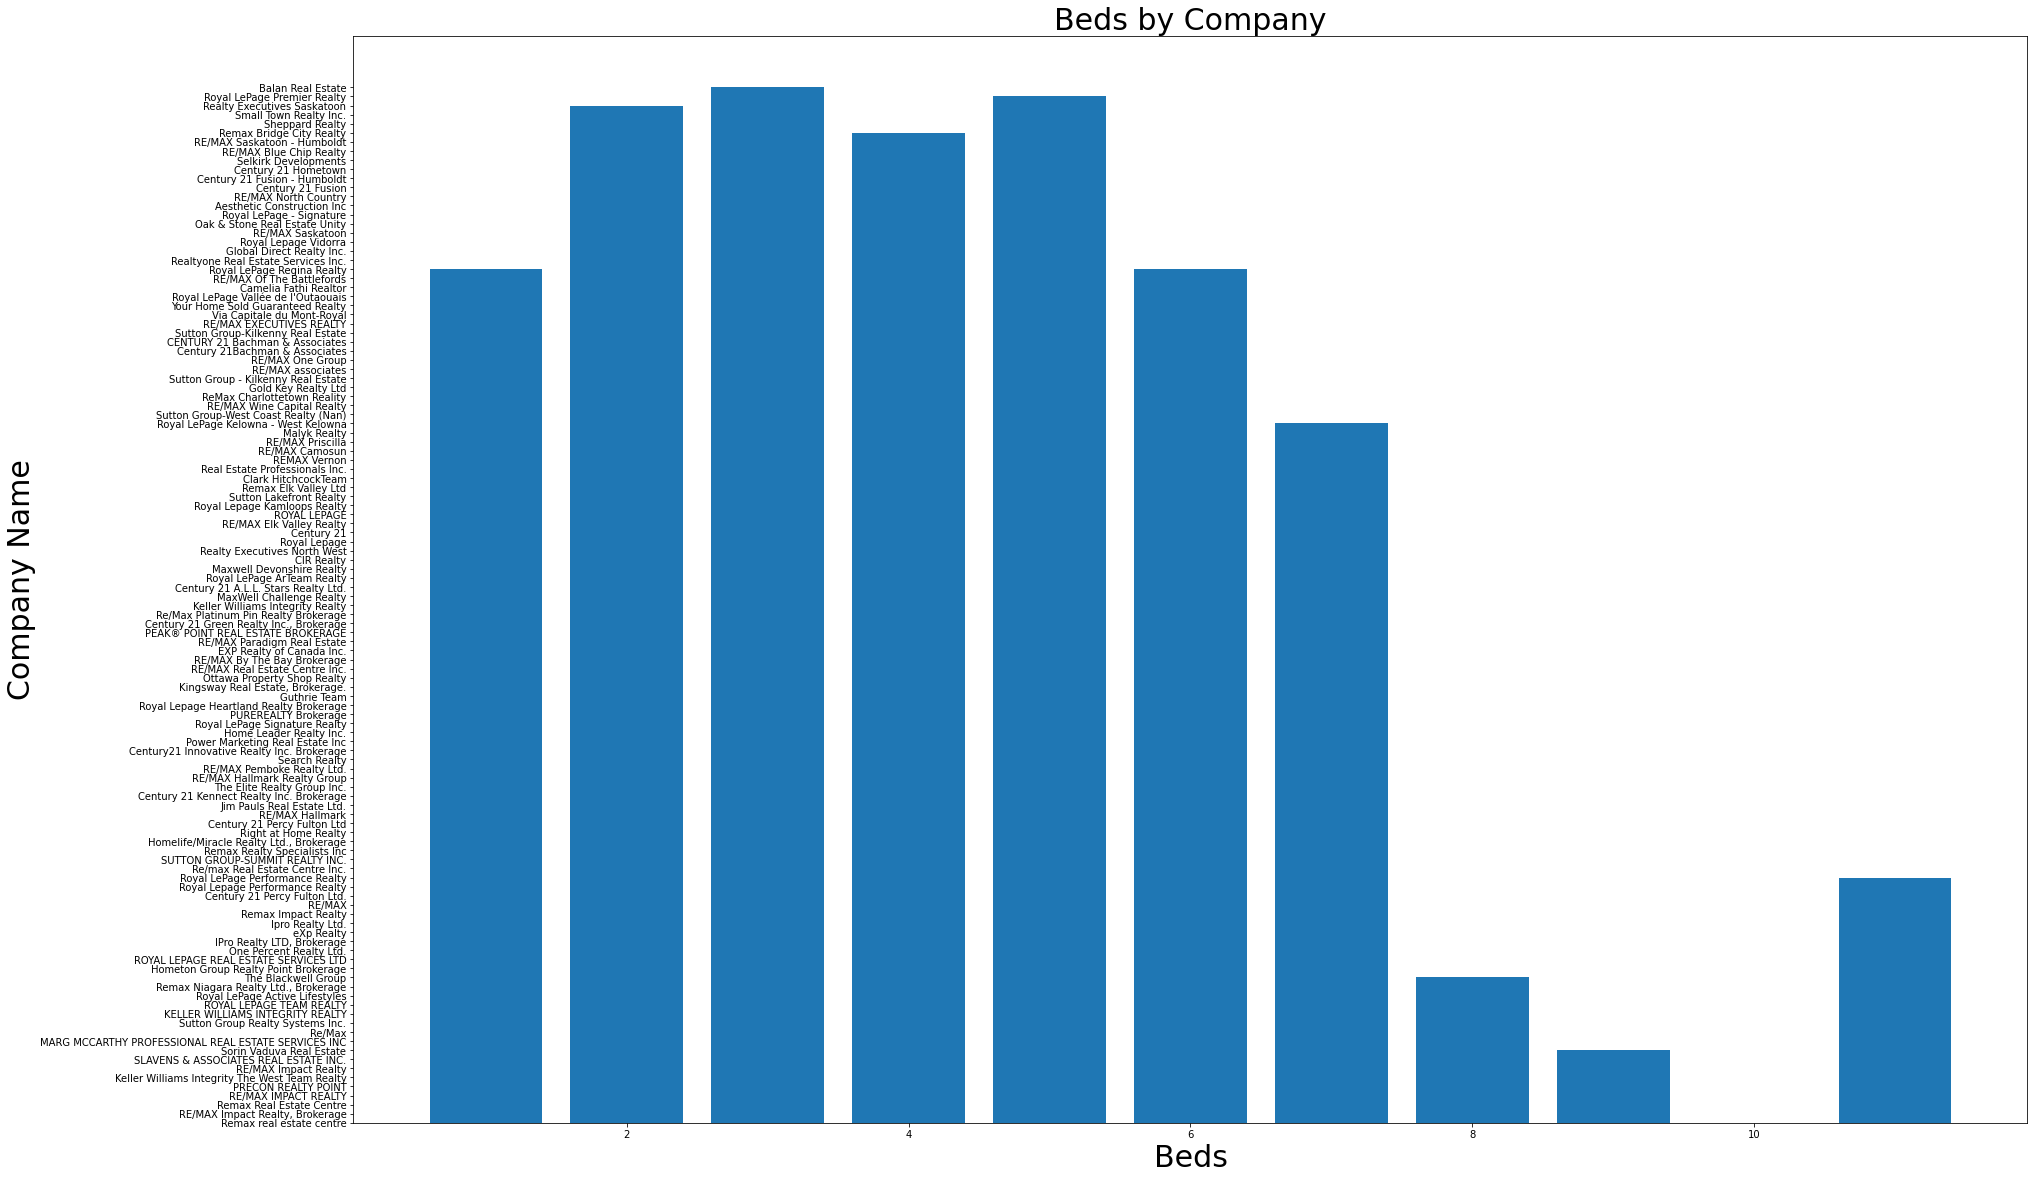

In [592]:
df2 = newdf.copy()
df2 = df2.dropna(axis=0)
fig,ax1=plt.subplots(figsize=(30,20))
ax1.bar(newdf["Type"],newdf["Price"])
ax1.set_title("Type of Apartment by Price",fontsize=30)
ax1.set_xlabel("Type of Apartment",fontsize=30)
ax1.set_ylabel("Price x 1000$ CAD",fontsize=30)
fig,ax2=plt.subplots(figsize=(30,20))
ax2.hist(newdf["Price"])
ax2.set_title("Number Of Apartments by Price",fontsize=30)
ax2.set_xlabel("Price x 1000$ CAD",fontsize=30)
ax2.set_ylabel("Numer of Apartments",fontsize=30)
fig,ax3=plt.subplots(figsize=(30,20))
ax3.barh(df2.City,df2.Price)
ax3.set_title("City by Price",fontsize=30)
ax3.set_xlabel("Price x 1000$ CAD",fontsize=30)
ax3.set_ylabel("City Name",fontsize=30)
fig,ax4=plt.subplots(figsize=(30,20))
ax4.scatter(newdf["Price"],newdf["Beds"])
ax4.set_title("Price by Beds",fontsize=30)
ax4.set_xlabel("Price x 1000$ CAD",fontsize=30)
ax4.set_ylabel("Beds",fontsize=30)
fig,ax5=plt.subplots(figsize=(30,20))
ax5.barh(df2["Seller"],df2["Beds"])
ax5.set_title("Seller Name by Beds",fontsize=30)
ax5.set_xlabel("Beds",fontsize=30)
ax5.set_ylabel("Seller Name",fontsize=30)
fig,ax6=plt.subplots(figsize=(30,20))
ax6.bar(df2["Beds"],df2["Company"])
ax6.set_title("Beds by Company",fontsize=30)
ax6.set_xlabel("Beds",fontsize=30)
ax6.set_ylabel("Company Name",fontsize=30)

In [581]:
y=newdf.iloc[:,1].values
newdf["City"]=LabelEncoder().fit_transform(newdf["City"])
newdf["Type"]=LabelEncoder().fit_transform(newdf["Type"])
newdf["Company"]=LabelEncoder().fit_transform(newdf["Company"])
newdf["Seller"]=LabelEncoder().fit_transform(newdf["Seller"])
X=newdf.drop(columns=["Address","Price"])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))

0.48709195159053187


In [587]:
y=newdf.iloc[:,1].values
X=newdf.drop(columns=["Address","Company","Seller","Price","Type","City"])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))

0.23720907807459857
